In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, Input, merge, Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten
import cPickle as pickle
data = pickle.load(open('data.p', 'rb'))
test_data = pickle.load(open('test_data.p', 'rb'))
extra = pickle.load(open('extra.p', 'rb'))

Using TensorFlow backend.


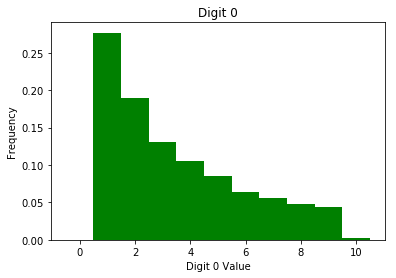

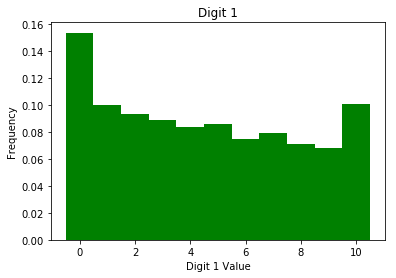

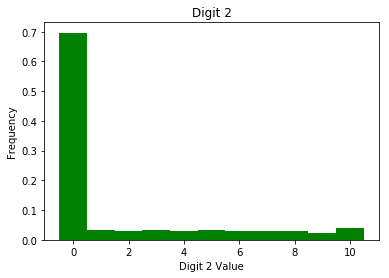

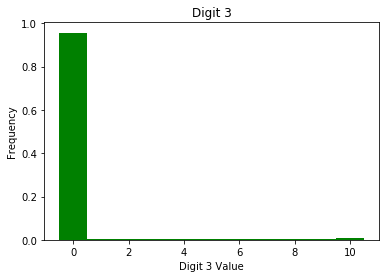

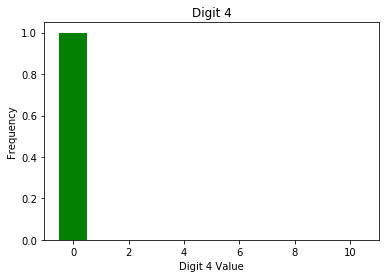

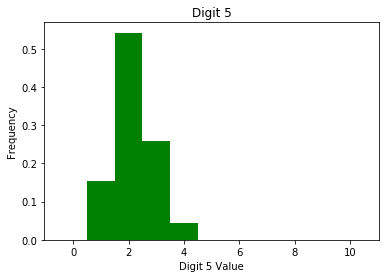

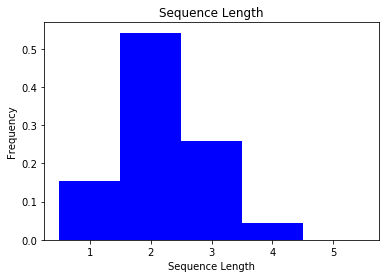

In [8]:
#Make frequency histograms of how ofte each digit occured
import matplotlib.mlab as mlab
list_label = data['label'].tolist()
digits = []
digits = [[] for x in xrange(6)]
for arr in list_label:
    for digit in xrange(6):
        digits[digit].append(arr[digit])

class_weight = {}
itr = 0
for digit in digits:

    # the histogram of the data
    n, bins, patches = plt.hist(digit, bins=11, normed=1, range=(-.5,10.5),facecolor='green')
    plt.xlabel('Digit ' + str(itr) + ' Value')
    plt.ylabel('Frequency')
    title = 'Digit ' + str(itr)
    plt.title(title)
    plt.show()
    itr+=1
# Histogram the length of sequence
n, bins, patches = plt.hist(digits[-1], bins=5, normed=1, range=(.5,5.5),facecolor='blue')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Sequence Length')
plt.show()

In [2]:
print data.keys()

['right', 'bottom', 'unified_label', 'top', 'label', 'width', 'names', 'height', 'left']


In [3]:
#find the width to height ratio for the image region that contains
#all of the individual chracter bounding boxes.
def whr(data):
    data['whr']= [None]*len(data['unified_label'])
    for index in range(0,len(data['unified_label'])):
        top=int(max(data['top'][index].min(),0))
        bottom = int(data['bottom'][index].max())
        left = int(max(data['left'][index].min(),0))
        right = int(data['right'][index].max())
        width = right - left
        height = bottom - top
        data['whr'][index] = float(width)/height

In [4]:
#Check to see if scaling to 54x54 square is appropriate.
#In this case it is 
whr(data)
print sum(data['whr'])/len(data['whr'])
whr(test_data)
print sum(test_data['whr'])/len(test_data['whr'])
whr(extra)
print sum(extra['whr'])/len(extra['whr'])

0.994100753148
1.01994445573
1.23867220502


In [5]:
print len(data['whr'])
print len(extra['whr'])
print len(test_data['whr'])

33402
202353
13068
